In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
import imageio

In [16]:
data = np.load('0000.npz')
data

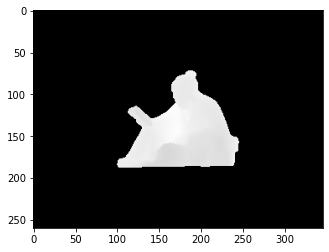

In [17]:
depth = data['depth_map']
plt.imshow(depth , cmap = 'gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


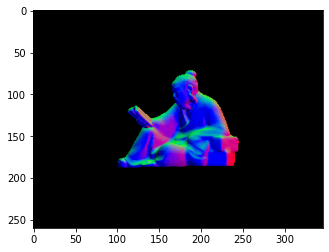

In [18]:
normal = data['normal_map']
plt.imshow(normal)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


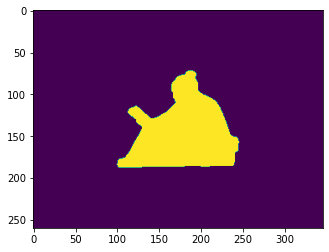

In [19]:
mask = np.where(depth>0, 1.0, depth)
mask = np.where(depth<0, 0.0, mask)
plt.imshow(mask)
plt.savefig('mask.png')
imageio.imwrite('mask.png', mask)


In [20]:
def save_fig(img, mask):
    temp = img
    for i in range(260):
        for j in range(346):
            temp[i][j][0] = 0.5 + temp[i][j][0]*0.5
            temp[i][j][1] = 0.5 + temp[i][j][1]*0.5
            temp[i][j][2] = 0.5 + temp[i][j][2]*0.5
    for i in range(0,3):
        temp[:,:,i] = temp[:,:,i]*mask
    return temp

In [21]:
gt = save_fig(normal, mask)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


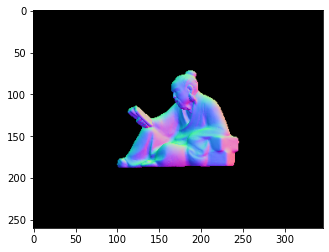

In [22]:
# print(n.shape)
plt.imshow(gt)
# plt.savefig('normal_gt.png')
imageio.imwrite('reading_normal_gt.png', gt)

In [23]:
print(depth.min())
print(depth.max())
scaled_depth = (depth - depth.min())/(depth.max()-depth.min()) * 255

-1.0
10.5859375


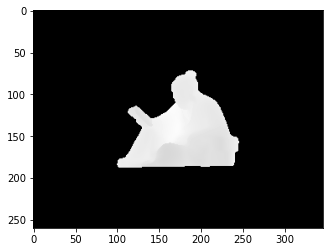

In [24]:
scaled_depth = np.where(scaled_depth <= 0.0, -1.0, scaled_depth)
plt.imshow(scaled_depth , cmap = 'gray')

In [25]:
zy, zx = np.gradient(scaled_depth)  

normal = np.dstack((zx, -zy, np.ones_like(scaled_depth)))
nn = np.linalg.norm(normal, axis=2)
normal[:, :, 0] /= nn
normal[:, :, 1] /= nn
normal[:, :, 2] /= nn

pred = normal * 1

# offset and rescale values to be in 0-255
pred += 1
pred /= 2
pred *= 255

for i in range(0,3):
        pred[:,:,i] = pred[:,:,i]*mask
i = pred[:, :, ::-1]
     
cv2.imwrite("reading_normal_pred.png", i)

True

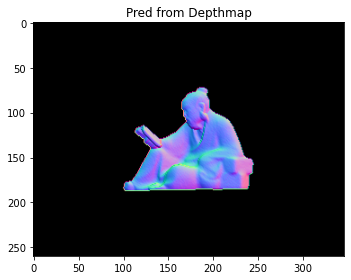

In [26]:
import matplotlib.image as img
pred = img.imread('./reading_normal_pred.png')
plt.imshow(pred)
plt.title('Pred from Depthmap')
plt.tight_layout()
plt.show()